In [1]:
%matplotlib inline
from importlib import reload
import scipy.sparse as sp
from scipy import stats
import numpy as np
from time import time
from tqdm import tqdm_notebook, tnrange
import sys
sys.path.append('../../')
import gc
import matplotlib.pyplot as plt
import qradient
from qradient.physical_components import Gates, State, Observable
from qradient.circuit_logic import McClean, Qaoa
from qradient.optimization_problems import MaxCut
from qradient import optimization
reload(qradient.optimization)
reload(qradient.circuit_logic)
reload(qradient.physical_components)
p = np.pi

In [ ]:
# McClean
times = []
qnums = np.arange(2, 10)
for q in qnums:
    print(q, end='\r')
    sys.stdout.flush()
    qnum, lnum = q, 100
    # construct observable
    zz = np.full([qnum, qnum], None)
    zz[0, 1] = 1.
    observable = {'zz': zz}
    crct = McClean(qnum, observable, lnum)
    t1 = time()
    e, g = crct.sample_grad_observable(hide_progbar=True)
    t2 = time()
    times.append(t2-t1)

In [ ]:
# Qaoa
upper_limit = 20
times = []
qnums = np.arange(2, upper_limit)
edge_nums = [int((i-1)*i/2) for i in range(2, upper_limit)]
for i, q in enumerate(qnums):
    print(q, end='\r')
    qnum, lnum = q, 100
    # construct observable
    problem = MaxCut(qnum, edge_nums[i])
    observable = problem.to_observable()
    crct = Qaoa(qnum, observable, lnum)
    t1 = time()
    e, g = crct.grad_run(np.random.rand(lnum), np.random.rand(lnum))
    t2 = time()
    times.append(t2-t1)

In [ ]:
plt.plot(
    qnums,
    times,
    '.-'
)
plt.plot(
    np.arange(2, 20),
    [0.01623821258544922, 0.018561124801635742, 0.016151905059814453, 0.01742696762084961, 0.021567106246948242, 0.03242802619934082, 0.03208589553833008, 0.03959918022155762, 0.055787086486816406, 0.10172414779663086, 0.16817522048950195, 0.2690119743347168, 0.49256396293640137, 1.024388074874878, 2.0767130851745605, 6.029428958892822, 14.512172222137451, 30.30225110054016],
    '.-'
)
plt.plot(
    np.arange(2, 5),
    [34.15019202232361, 81.15203189849854, 157.31651711463928],
    '.-'
)
plt.plot(
    np.arange(2, 14),
    [1.0806846618652344, 2.0113892555236816, 3.056966781616211, 4.445823907852173, 6.978492021560669, 9.170605182647705, 12.007479906082153, 17.199953079223633, 23.510040998458862, 35.75929284095764, 68.48120307922363, 130.20919704437256],
    '.-'
)
plt.plot(
    np.arange(2, 12),
    [0.38955020904541016, 0.5613417625427246, 0.7360739707946777, 0.9211061000823975, 1.1184780597686768, 1.4670140743255615, 2.197295904159546, 4.415586948394775, 14.712743043899536, 80.63775300979614],
    '.-'
)
plt.plot(
    np.arange(2, 20),
    [0.014364242553710938, 0.016437053680419922, 0.025570154190063477, 0.02915215492248535, 0.036782264709472656, 0.050038814544677734, 0.06127214431762695, 0.07237792015075684, 0.0853269100189209, 0.12619900703430176, 0.2210390567779541, 0.40416693687438965, 0.709496021270752, 1.4257869720458984, 3.1304709911346436, 9.545304775238037, 22.091165781021118, 46.848978996276855],
    '.-'
)
plt.plot(
    np.arange(2, 20),
    [0.00426483154296875, 0.0051882266998291016, 0.007730960845947266, 0.013195991516113281, 0.01037907600402832, 0.01190495491027832, 0.01484990119934082, 0.01844501495361328, 0.024294137954711914, 0.039817094802856445, 0.07553291320800781, 0.0956578254699707, 0.1903076171875, 0.3501279354095459, 0.7092928886413574, 2.1062841415405273, 5.404352903366089, 11.583475828170776],
    '.-',
)
plt.plot(
    np.arange(2, 20),
    [0.003584146499633789, 0.00443720817565918, 0.006603717803955078, 0.011257410049438477, 0.009017467498779297, 0.010489702224731445, 0.01302790641784668, 0.016591787338256836, 0.022073984146118164, 0.037033796310424805, 0.07164120674133301, 0.09276533126831055, 0.18657326698303223, 0.34607601165771484, 0.7037882804870605, 2.094646453857422, 5.386331558227539, 11.556207180023193],
    '.-',
)
plt.plot(
    np.arange(2, 20),
    [0.0046520233154296875, 0.011852025985717773, 0.01120615005493164, 0.006968975067138672, 0.01005697250366211, 0.011497020721435547, 0.01263117790222168, 0.017317771911621094, 0.02205371856689453, 0.031369924545288086, 0.06088876724243164, 0.11853194236755371, 0.2673170566558838, 0.4385390281677246, 0.8981561660766602, 2.9883079528808594, 7.627803802490234, 17.228317975997925],
    '.-',
)
plt.plot(
    np.arange(2, 13),
    [0.14130878448486328, 0.16709399223327637, 0.2570180892944336, 0.30667734146118164, 0.4374258518218994, 1., 3., 9., 46., 183., 621.],
    '.-'
)
plt.plot(
    np.arange(2, 20),
    [0.15650701522827148, 0.1413869857788086, 0.18457412719726562, 0.2631371021270752, 0.26929783821105957, 0.33814096450805664, 0.3703949451446533, 0.42498111724853516, 0.4644758701324463, 0.5217039585113525, 0.5982811450958252, 0.7350590229034424, 0.9454901218414307, 1.1823008060455322, 1.7560300827026367, 4.008991956710815, 11.834168195724487, 23.749961137771606],
    '.-'
)
plt.semilogy()
plt.legend([
    'new',
    'qaoa.grad_run',
    'pennylane .jacobian',
    'sample_grad',
    'sample_grad_observable (u/c)',
    'grad_run (uncompiled)',
    'scratch (uncompiled)',
    'matrix mult. time',
    'scratch (compiled)',
    'pennylane 0.3.1', 
    'pennylane 0.4.0'
], bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.xlabel('Qubits')
plt.ylabel('Runtime 100 layers [sec.]')
plt.xticks(np.arange(2, 20))
plt.grid(True)
plt.show()

In [2]:
qnum, lnum = 2, 1
zz = np.full([qnum, qnum], None)
for i in range(qnum):
    for j in range(i+1, qnum):
        zz[i, j] = np.random.rand()
x = np.random.rand(qnum)
y = np.random.rand(qnum)
z = np.random.rand(qnum)
observable = {'x': x, 'y': y, 'z': z, 'zz': zz}
crct = qradient.circuit_logic.McClean(qnum, observable, lnum)
shots = (10**np.arange(1, 8, .1)).astype('int')
diffs, diffs2 = [], []
for s in shots:
    print(s, end='\r'); sys.stdout.flush()
    e1, g1 = crct.grad_run()
    e2, g2 = crct.sample_grad(shot_num=s, hide_progbar=True, exact_expec_val=False)
    diffs.append(np.linalg.norm(g1.flatten() - g2.flatten()))
    diffs2.append(np.abs(e2 - e1))
plt.plot(shots, diffs, '.-')
plt.plot(shots, diffs2, '.-')
plt.loglog()
plt.show()

KeyboardInterrupt: 

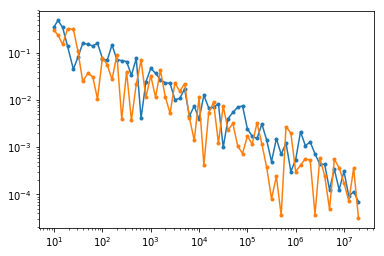

In [4]:
plt.plot(shots[:len(diffs)], diffs, '.-')
plt.plot(shots[:len(diffs2)], diffs2, '.-')
plt.loglog()
plt.show()

## Barren plateus

In [ ]:
variances = []
var_mins = []
var_maxs = []
snum = 100
qnums = np.arange(2, 11, 2)
for qnum in qnums:
    print(qnum, end='\r')
    sys.stdout.flush()
    lnum = 100
    zz = np.full((qnum, qnum), None)
    zz[0, 1] = 1.
    crct = qradient.circuit_logic.McClean(qnum, {'zz': zz}, lnum)
    axes = (3 * np.random.rand(snum, lnum, qnum)).astype('int')
    angles = 2*np.pi * np.random.rand(snum, lnum, qnum)
    expectations = []
    for i in tnrange(snum):
        crct.axes = axes[i]
        crct.angles = angles[i]
        _, g = crct.grad_run(hide_progbar=True)
        expectations.append(g[0,0])
    v = stats.bayes_mvs(expectations)[1]
    variances.append(v[0])
    var_mins.append(v[1][0])
    var_maxs.append(v[1][1])

In [ ]:
reg = stats.linregress(qnums, np.log(np.array(variances)))
print("Slope = {}".format(reg[0]))
abscissa = np.arange(min(qnums), max(qnums)+.1, .1)
plt.plot(abscissa, np.exp(reg[0]*abscissa + np.full(len(abscissa), reg[1])), 'r--')
plt.errorbar(
            qnums,
            variances,
            yerr=[var_mins, var_maxs],
            marker="."
)
plt.semilogy()
plt.show()